La imagen tiene 4 bandas.


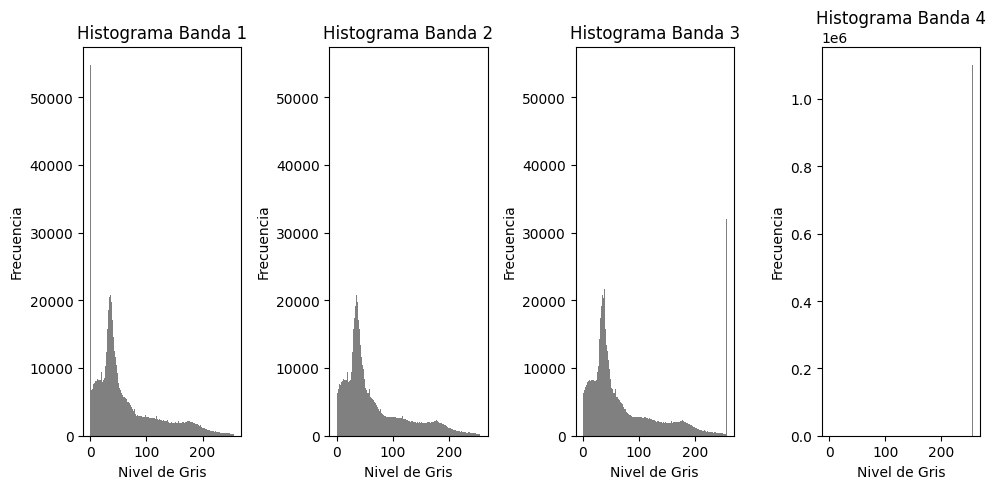

In [1]:
import cv2
import matplotlib.pyplot as plt

def mostrar_histograma_bandas(ruta_imagen):
    # Cargar la imagen en modo multicanal
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)

    # Comprobar si la imagen tiene múltiples bandas
    if len(imagen.shape) == 2:
        print("La imagen tiene solo una banda de grises.")
        bandas = [imagen]
    else:
        print(f"La imagen tiene {imagen.shape[2]} bandas.")
        bandas = cv2.split(imagen)

    # Configuración de la gráfica
    plt.figure(figsize=(10, 5))

    # Generar y mostrar histograma para cada banda
    for i, banda in enumerate(bandas):
        plt.subplot(1, len(bandas), i+1)
        plt.hist(banda.ravel(), bins=256, range=[0, 256], color='gray')
        plt.title(f'Histograma Banda {i+1}')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Ruta a la imagen
ruta_imagen = 'bariloche2/B1.tif'
mostrar_histograma_bandas(ruta_imagen)

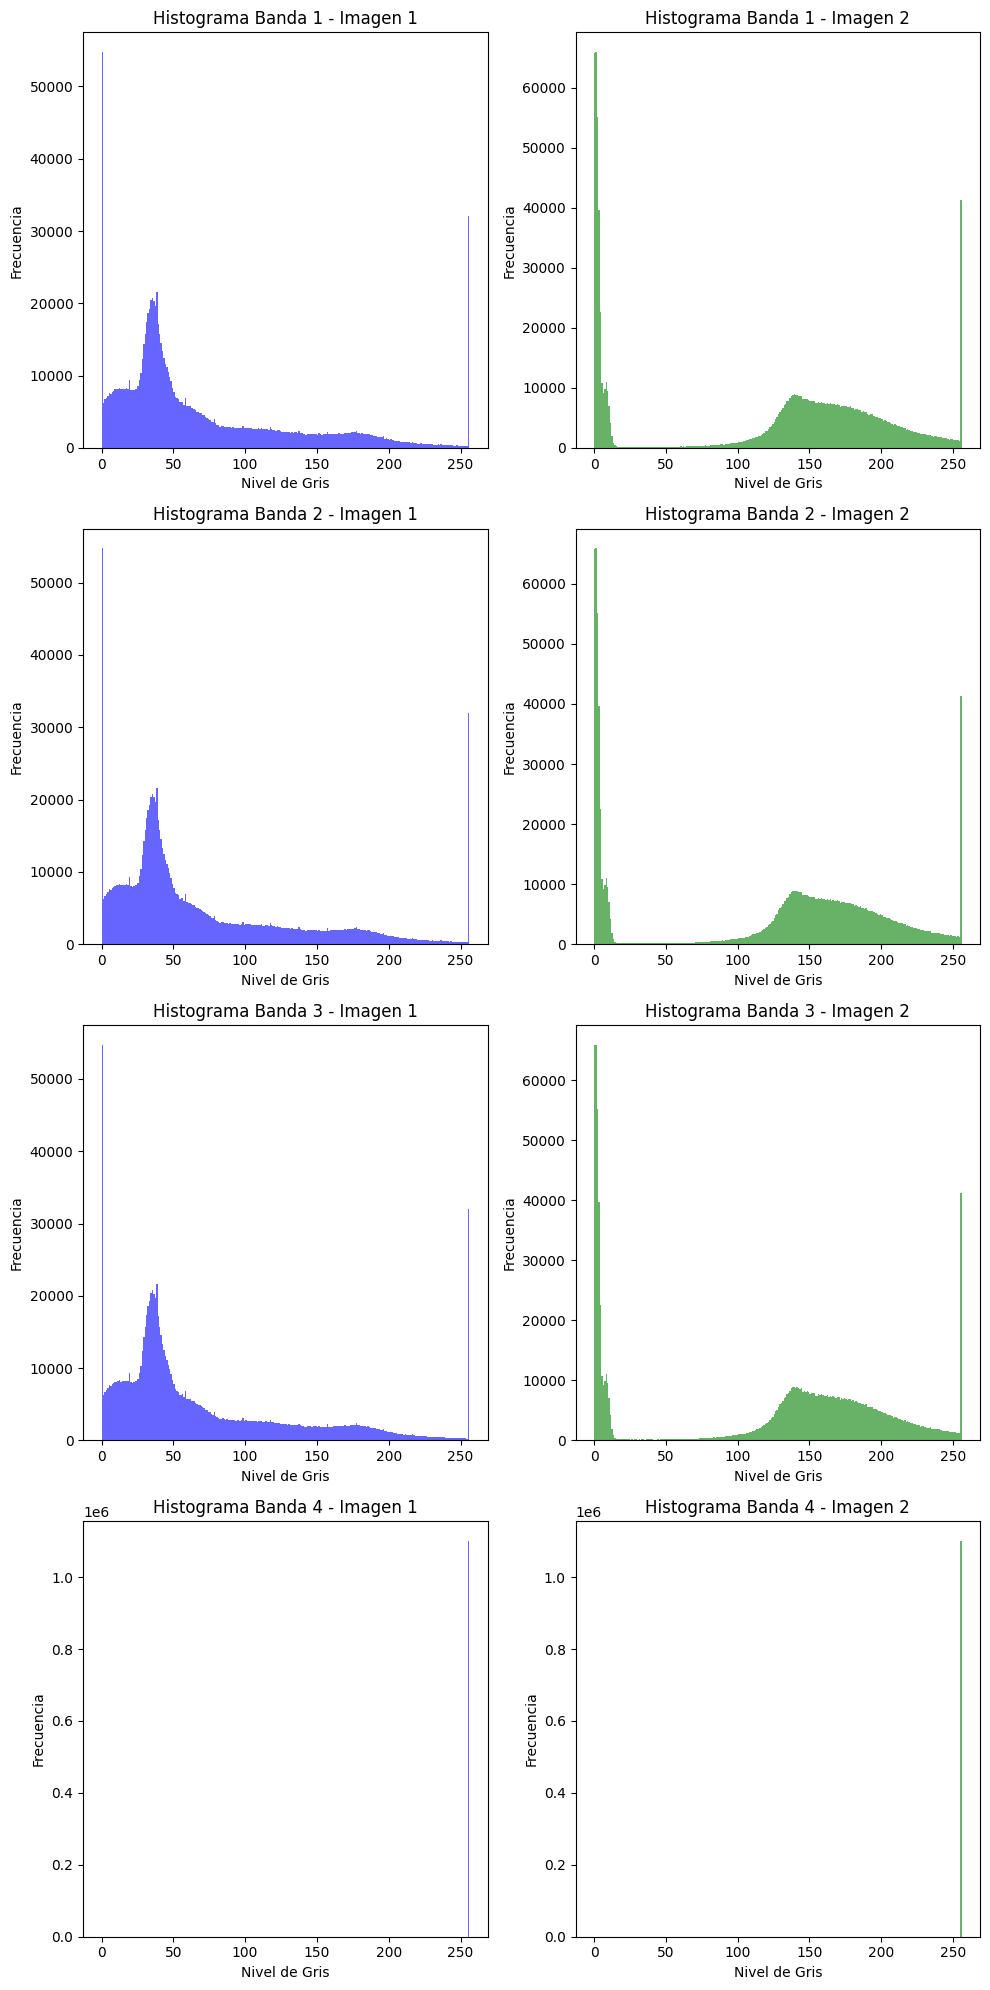

In [2]:
def mostrar_histograma_bandas(ruta_imagen1, ruta_imagen2):
    # Cargar las dos imágenes en modo multicanal
    imagen1 = cv2.imread(ruta_imagen1, cv2.IMREAD_UNCHANGED)
    imagen2 = cv2.imread(ruta_imagen2, cv2.IMREAD_UNCHANGED)

    # Verificar si ambas imágenes tienen el mismo número de bandas
    if len(imagen1.shape) != len(imagen2.shape) or (len(imagen1.shape) > 2 and imagen1.shape[2] != imagen2.shape[2]):
        print("Las imágenes tienen un número de bandas diferente y no se pueden comparar directamente.")
        return

    # Separar en bandas cada imagen
    bandas_imagen1 = [imagen1] if len(imagen1.shape) == 2 else cv2.split(imagen1)
    bandas_imagen2 = [imagen2] if len(imagen2.shape) == 2 else cv2.split(imagen2)

    # Configuración de la gráfica
    num_bandas = len(bandas_imagen1)
    plt.figure(figsize=(10, 5 * num_bandas))

    # Generar y mostrar histogramas para cada banda
    for i, (banda1, banda2) in enumerate(zip(bandas_imagen1, bandas_imagen2)):
        # Histograma de la primera imagen
        plt.subplot(num_bandas, 2, 2 * i + 1)
        plt.hist(banda1.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.6)
        plt.title(f'Histograma Banda {i+1} - Imagen 1')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Frecuencia')

        # Histograma de la segunda imagen
        plt.subplot(num_bandas, 2, 2 * i + 2)
        plt.hist(banda2.ravel(), bins=256, range=[0, 256], color='green', alpha=0.6)
        plt.title(f'Histograma Banda {i+1} - Imagen 2')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Rutas de las imágenes
ruta_imagen1 = 'bariloche2/B1.tif'
ruta_imagen2 = 'bariloche2/B5.tif'
mostrar_histograma_bandas(ruta_imagen1, ruta_imagen2)
